# TITANIC PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


there are some missing values and needs to be encoded

In [5]:
df.shape

(891, 12)

there are 891 rows and 12 columns

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in Age column,687 missing values in Cabin column and 2 missing values in embarked column.

Missing value treatment

In [9]:
df['Age']=df['Age'].fillna(df['Age'].median())

Since there are too many missing values in Cabin column and only 2 missing values in embarked column it can be neglected.

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

heat map for the interpretation of null values

<AxesSubplot:>

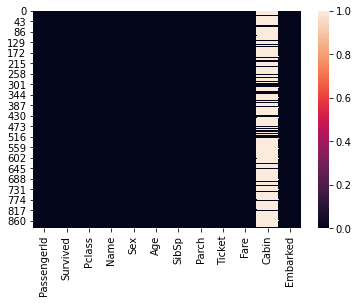

In [11]:
sns.heatmap(df.isnull())

summary statistics

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


High standard devition are present in PassengerId,Age and Fare column which indicates that the data is spread too much and the range is high

PassengerId,Age and Farehave mean greater than median.It means the variables in these columns haveright skewed data and the difference between 75th percentileand max is also high which indicates the presence of outliers.

Skewness

In [13]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

<AxesSubplot:>

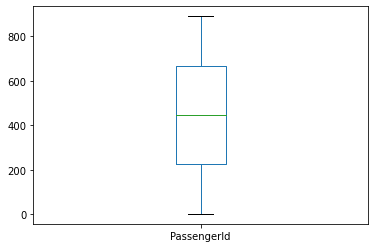

In [14]:
df['PassengerId'].plot.box()

outliers are absent in this column

<AxesSubplot:>

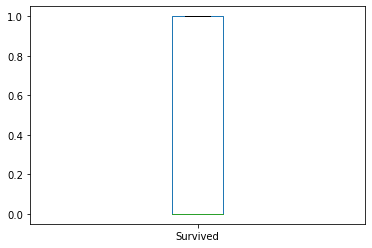

In [15]:
df['Survived'].plot.box()

outliers are absent in this column

<AxesSubplot:>

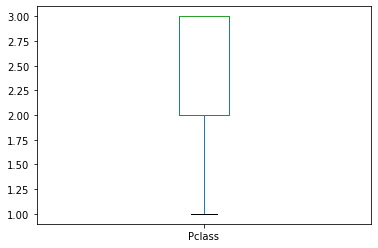

In [16]:
df['Pclass'].plot.box()

outliers are absent in this column

<AxesSubplot:>

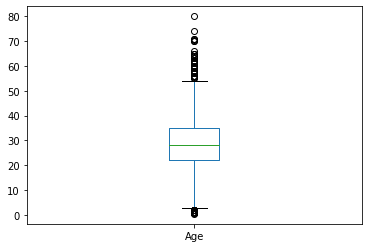

In [17]:
df['Age'].plot.box()

outliers are present in this column

<AxesSubplot:>

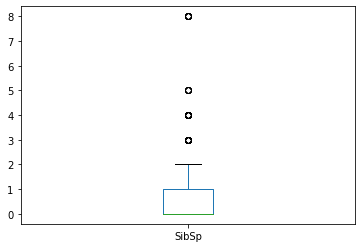

In [18]:
df['SibSp'].plot.box()

outliers are present in this column

<AxesSubplot:>

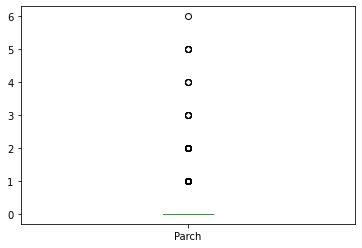

In [19]:
df['Parch'].plot.box()

outliers are present in this column

<AxesSubplot:>

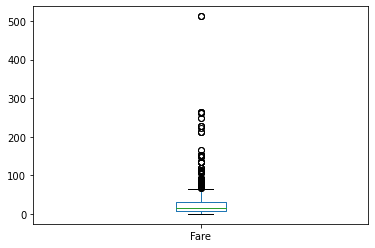

In [20]:
df['Fare'].plot.box()

outliers are present in this column

Collective representation of the columns

PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Parch          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fare           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

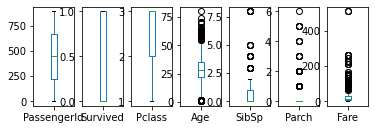

In [21]:
df.plot(kind='box',subplots=True,layout=(2,7))

outliers removal

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]

TypeError: can only concatenate str (not "float") to str

In [ ]:
df.skew()

Graphical representation of skewness

In [ ]:
df['PassengerId'].plot.hist()

No skewness present 

<AxesSubplot:ylabel='Frequency'>

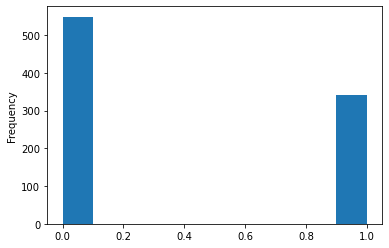

In [23]:
df['Survived'].plot.hist()

skewness present in the range of +/-0.65 hence can be neglected

<AxesSubplot:ylabel='Frequency'>

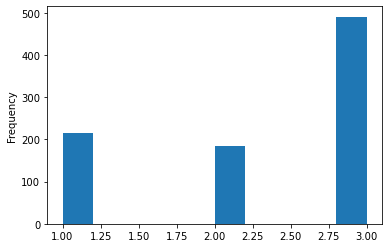

In [24]:
df['Pclass'].plot.hist()

skewness present in the range of +/-0.65 hence can be neglected

<AxesSubplot:ylabel='Frequency'>

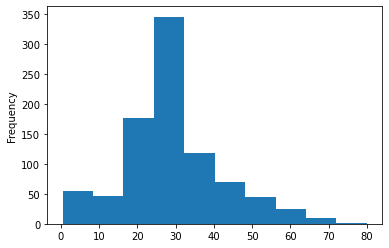

In [25]:
df['Age'].plot.hist()

skewness present in the range of +/-0.65 hence can be neglected

<AxesSubplot:ylabel='Frequency'>

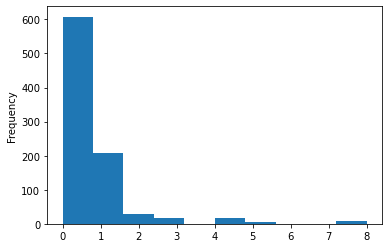

In [26]:
df['SibSp'].plot.hist()

skewness present

<AxesSubplot:ylabel='Frequency'>

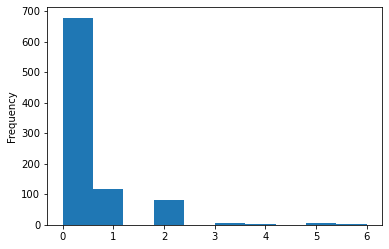

In [27]:
df['Parch'].plot.hist()

skewness present

<AxesSubplot:ylabel='Frequency'>

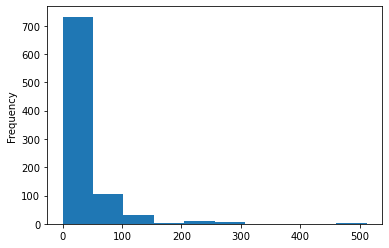

In [28]:
df['Fare'].plot.hist()

skewness present

removal of skewness

In [29]:
from scipy.stats import boxcox
#0--->log transform
#.5--->square root transform
df['PassengerId']=boxcox(df['PassengerId'],0)

<AxesSubplot:ylabel='Frequency'>

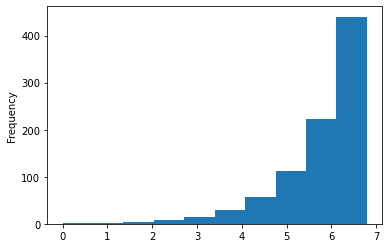

In [30]:
df['PassengerId'].plot.hist()

In [31]:
df['Age']=boxcox(df['Age'],0)

<AxesSubplot:ylabel='Frequency'>

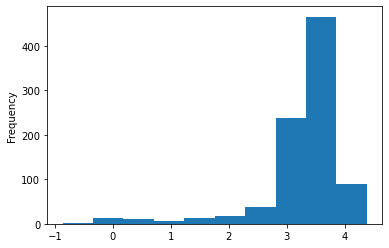

In [32]:
df['Age'].plot.hist()

bivariate analysis

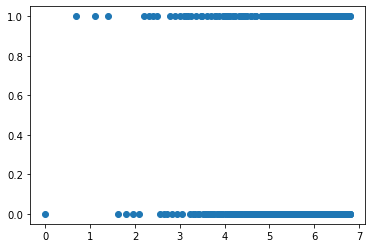

In [33]:
plt.scatter(df['PassengerId'],df['Survived'])
plt.show()

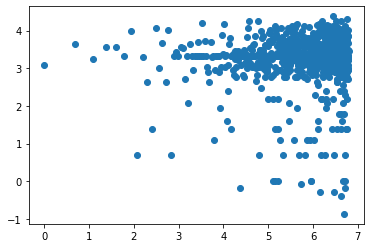

In [34]:
plt.scatter(df['PassengerId'],df['Age'])
plt.show()

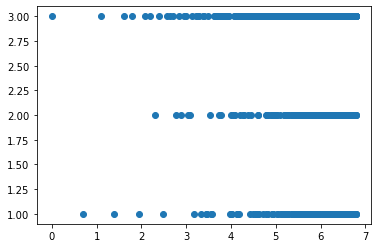

In [35]:
plt.scatter(df['PassengerId'],df['Pclass'])

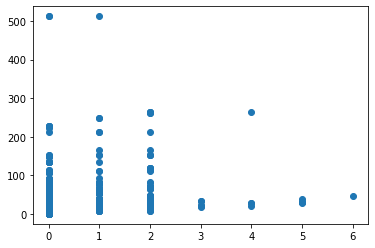

In [36]:
plt.scatter(df['Parch'],df['Fare'])

Multivariate analysis

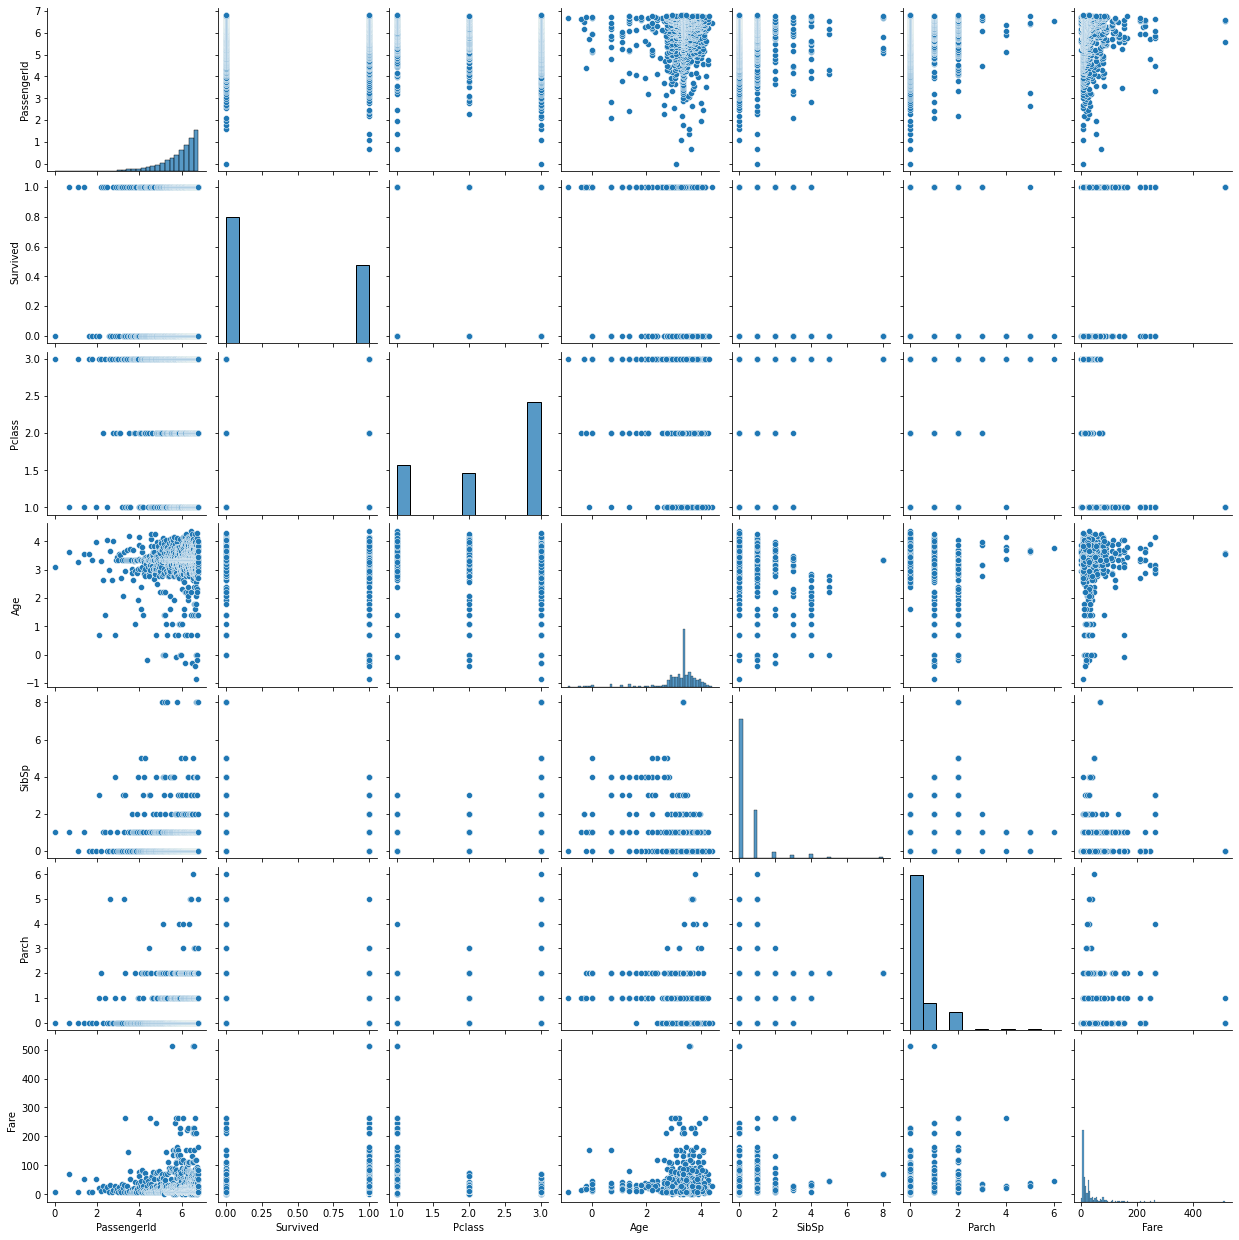

In [37]:
sns.pairplot(df)

Pairplot plots the graph between two variables and we can see that somecolumns are positively related,some are negatively related and some have a neutral relation.

Co-Ralation using Haet map

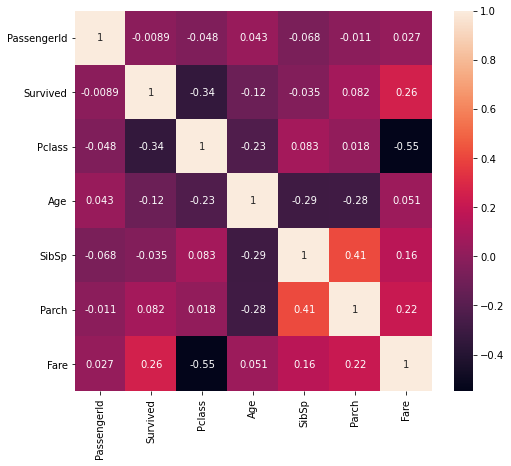

In [38]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

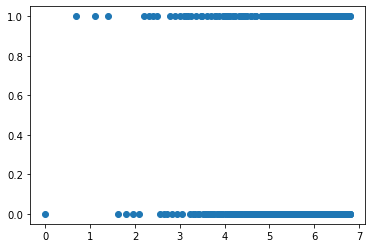

In [39]:
plt.scatter(df['PassengerId'],df['Survived'])
plt.show()

dropping Cabin and embarked column as they have too many null values

In [40]:
df.drop('Cabin',axis=1,inplace=True)

In [41]:
df.drop('Embarked',axis=1,inplace=True)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.000000,0,3,"Braund, Mr. Owen Harris",male,3.091042,1,0,A/5 21171,7.2500
1,0.693147,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.637586,1,0,PC 17599,71.2833
2,1.098612,1,3,"Heikkinen, Miss. Laina",female,3.258097,0,0,STON/O2. 3101282,7.9250
3,1.386294,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.555348,1,0,113803,53.1000
4,1.609438,0,3,"Allen, Mr. William Henry",male,3.555348,0,0,373450,8.0500


In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

cabin and embarked columns are removed

In [55]:
features=df.drop('Survived',axis=1)
target=df['Survived']

In [56]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)
    lr.fit(features_train,target_train)

ValueError: could not convert string to float: 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'

In [59]:
pred_test=lr.predict(features_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [60]:
print(r2_score(target_test,pred_test))

NameError: name 'pred_test' is not defined